# Sentiment Analysis
* **Name:** Aldo Barriente
* **Email:** aib9jp@virginia.edu
* **Course:** DS 5001
* **Date:** 20 April 2021

## Set up

In [1]:
data_in = './data_in'
data_out = './data_out'
data_prefix = 'zapatistas'

In [9]:
tokens_csv =  f'{data_in}/{data_prefix}-TOKEN.csv'
OHCO = ['text_id', 'section_num', 'para_num', 'sent_num'] # We exclude genre
SECTION = OHCO[2:3]
PARAS = OHCO[2:4]
SENTS = OHCO[2:5]

In [3]:
salex_csv = f'{data_in}/lexicons/salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

## Get Lexicon

In [5]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [6]:
salex['polarity'] = salex.positive - salex.negative

## Lexicon Columns

In [8]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

## Novels

In [40]:
TOKENS = pd.read_csv(tokens_csv).set_index(OHCO).sort_index()
LIB = pd.read_csv("{}/{}-LIB.csv".format(data_in, data_prefix)).set_index('text_id').sort_index()
TOKENS = TOKENS.join(LIB)
TOKENS = TOKENS.reset_index().set_index(['text_title']+OHCO)

In [85]:
LIB

,text_title,text_file,tfidf_sum,tfidf_mean
text_id,,,,
1,The Revolt,./data_in\zapatistas-ch1.txt,3404.833849,0.851208
2,The First Days,./data_in\zapatistas-ch2.txt,3946.819307,0.986705
3,The Cease - Fire,./data_in\zapatistas-ch3.txt,4422.099618,1.105525
4,Solidarity,./data_in\zapatistas-ch4.txt,2767.551815,0.691888
5,Broadening the Struggle,./data_in\zapatistas-ch5.txt,4475.751055,1.118938
6,Building Ties,./data_in\zapatistas-ch6.txt,2366.241261,0.591560
7,Before the Dialogue,./data_in\zapatistas-ch7.txt,3600.266918,0.900067
8,The Dialogue,./data_in\zapatistas-ch8.txt,4918.226172,1.229557
9,Concluding the Dialogue,./data_in\zapatistas-ch9.txt,2593.543853,0.648386


In [41]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [42]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [43]:
TOKENS

token_num  \
text_title                       text_id section_num para_num sent_num              
The Revolt                       1       1           0        0                 0   
                                                              0                 1   
                                                              0                 2   
                                                              0                 3   
                                                              0                 4   
...                                                                           ...   
Rejecting the Government's Offer 12      6           70       0                18   
                                                              0                19   
                                                              0                20   
                                                              0                21   
                                                              0                22   

                                                                                     pos_tuple  \
text_title                       text_id section_num para_num sent_num                           
The Revolt                       1       1           0        0                 ('[The', 'JJ')   
                                                              0             ('Mexican', 'NNP')   
                                                              0            ('Awakener', 'NNP')   
                                                              0                 ('[El', 'NNP')   
                                                              0         ('Despertador', 'NNP')   
...                                                                                        ...   
Rejecting the Government's Offer 12      6           70       0          ('Liberation', 'NNP')   
                                                              0                ('Army', 'NNP')   
                                                              0              ('Mexico', 'NNP')   
                                                              0               ('June,', 'NNP')   
                                                              0                 ('1994', 'CD')   

                                                                        pos  \
text_title                       text_id section_num para_num sent_num        
The Revolt                       1       1           0        0          JJ   
                                                              0         NNP   
                                                              0         NNP   
                                                              0         NNP   
                                                              0         NNP   
...                                                                     ...   
Rejecting the Government's Offer 12      6           70       0         NNP   
                                                              0         NNP   
                                                              0         NNP   
                                                              0         NNP   
                                                              0          CD   

                                                                          token_str  \
text_title                       text_id section_num para_num sent_num                
The Revolt                       1       1           0        0                [The   
                                                              0             Mexican   
                                                              0            Awakener   
                                                              0                 [El   
                                                              0         Despertador   
...                                                   

In [50]:
dialogue = ('The Dialogue')
revolt = ('The Revolt')

In [68]:
DIALOGUE = TOKENS.loc[dialogue].copy()
REVOLT = TOKENS.loc[revolt].copy()

<AxesSubplot:>

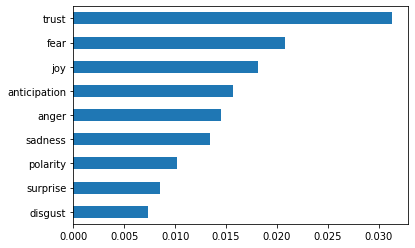

In [69]:
DIALOGUE[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

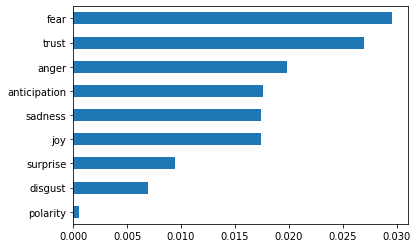

In [53]:
REVOLT[emo_cols].mean().sort_values().plot.barh()

## Sentiment by Chapter

In [70]:
DIALOGUE_sec = DIALOGUE.groupby(SECTION)[emo_cols].mean()
REVOLT_sec = REVOLT.groupby(SECTION)[emo_cols].mean()

In [55]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

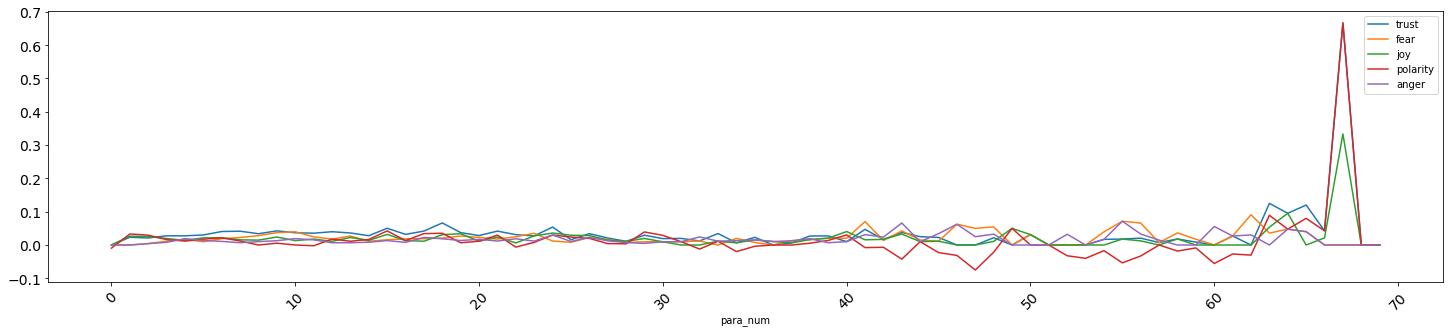

In [56]:
plot_sentiments(DIALOGUE_sec, ['trust','fear','joy','polarity','anger'])

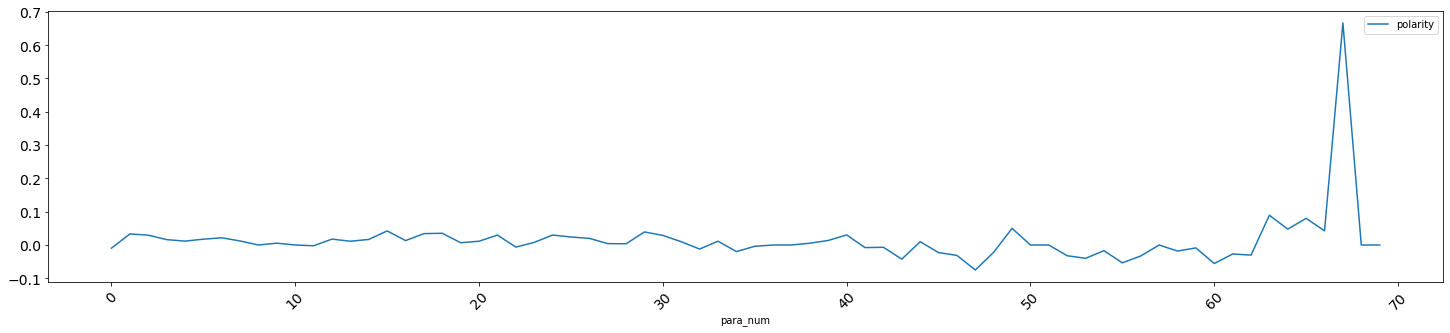

In [58]:
plot_sentiments(DIALOGUE_sec, ['polarity'])

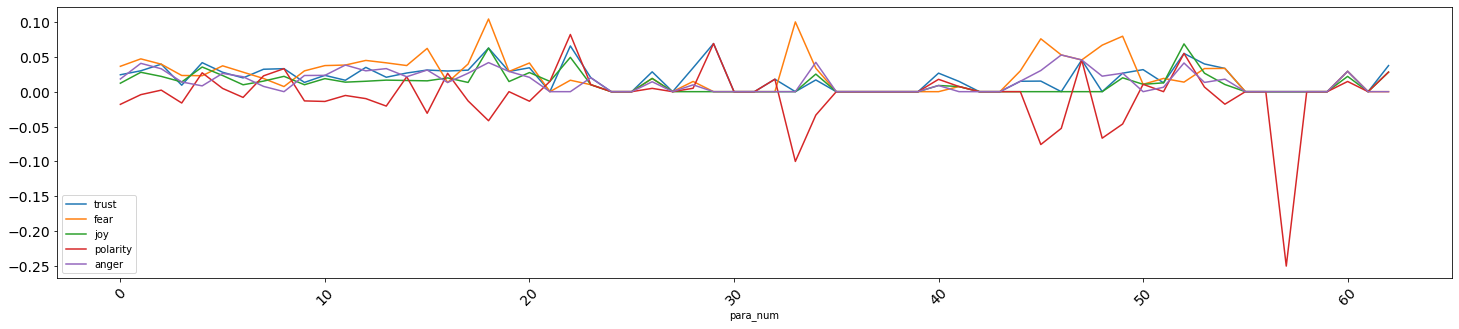

In [59]:
plot_sentiments(REVOLT_sec, ['trust','fear','joy','polarity','anger'])

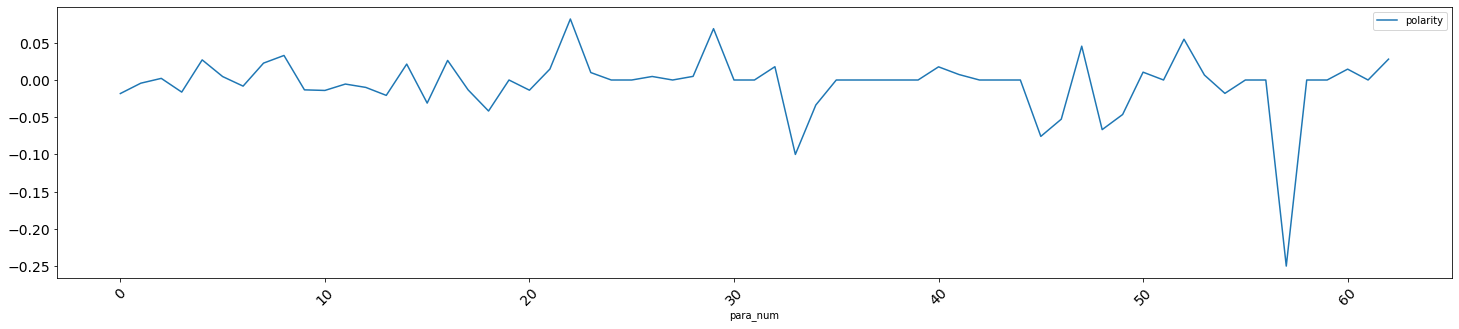

In [60]:
plot_sentiments(REVOLT_sec, ['polarity'])

## Explore Sentiment in Texts

In [71]:
DIALOGUE['html'] =  DIALOGUE.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
REVOLT['html'] =  REVOLT.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)

In [72]:
DIALOGUE_sents = DIALOGUE.groupby(SENTS)[emo_cols].mean()
REVOLT_sents = REVOLT.groupby(SENTS)[emo_cols].mean()

In [73]:
DIALOGUE_sents['sent_str'] = DIALOGUE.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
DIALOGUE_sents['html_str'] = DIALOGUE.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [74]:
REVOLT_sents['sent_str'] = REVOLT.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
REVOLT_sents['html_str'] = REVOLT.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [75]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [77]:
sample_sentences(DIALOGUE_sents)

In [78]:
sample_sentences(REVOLT_sents)

Sentiment,ID,Sentence
-0.0244,"(49, 2)",i make public therefore the offer for the 31st military zone and the battalions and units of the federal army to abandon the federal government and join our cause in one single army respecting their ranks and their chain of command
0.0,"(61, 1)",what is happening
-0.0952,"(53, 8)",in case of problems we are not going to take hostages or take anyone by force with us to protect us
0.0357,"(41, 2)",that is the immediate plan that we have that is to organize the rural life of this country according to the will of the majority of our companeros
0.0,"(54, 5)",there has been no attempt other than that of the national human rights commission which did approach us to ask for the free passage of foreigners
0.0,"(60, 2)",that is the situation
0.0,"(2, 7)",and it is not fair
-0.0333,"(50, 0)",it has already been agreed and tomorrow a commission is ready to certify that we did not harm anyone it will be allowed to leave on the side of tuxtla
0.0,"(62, 0)",m what i know is nothing more than you know
-0.25,"(13, 4)",they are a mess


## VADER

In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [81]:
DIALOGUE_vader_cols = DIALOGUE_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
DIALOGUE_vader = pd.concat([DIALOGUE_sents, DIALOGUE_vader_cols], axis=1)

<AxesSubplot:xlabel='para_num,sent_num'>

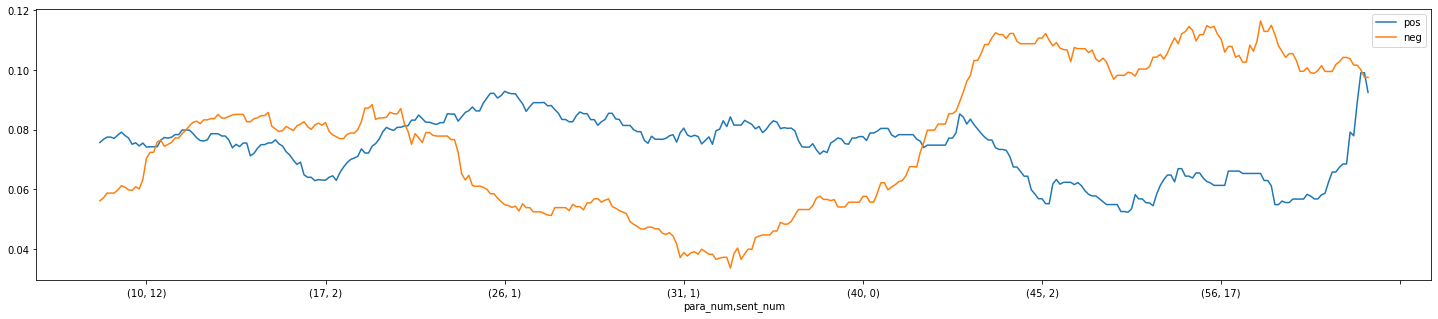

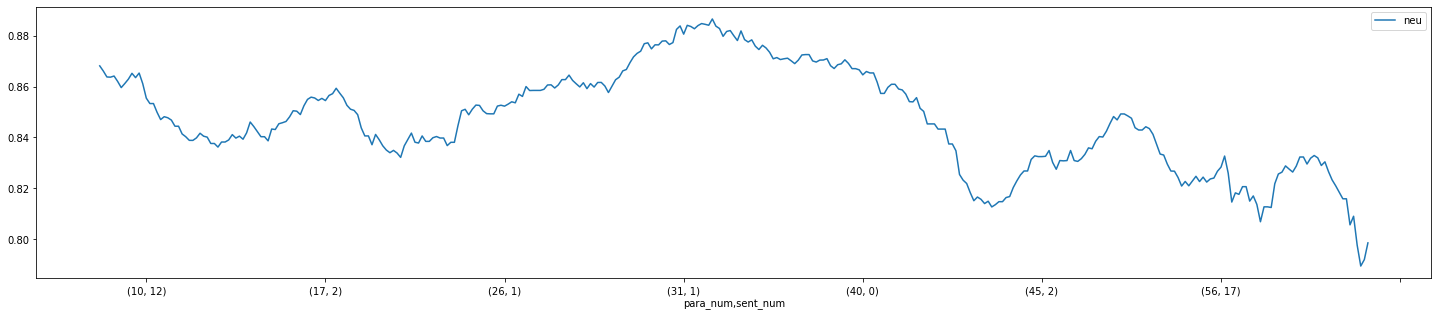

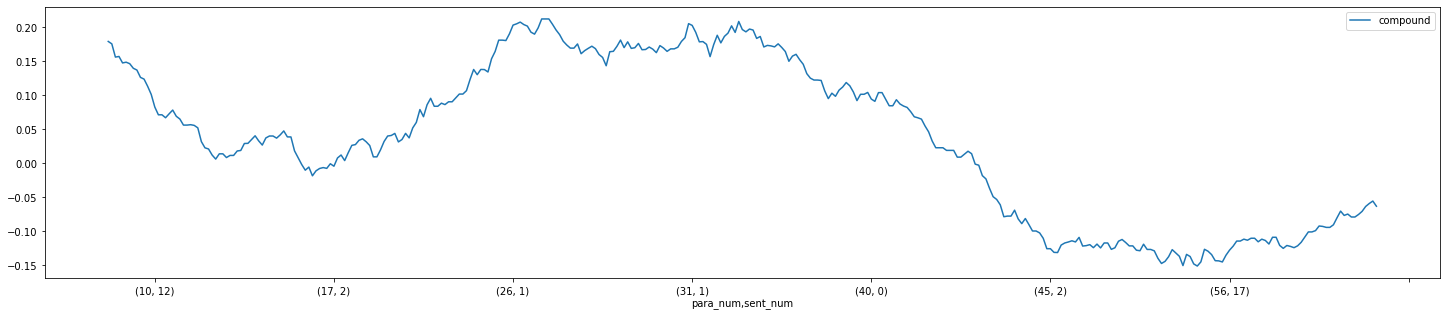

In [82]:
w = int(DIALOGUE_vader.shape[0] / 5)
DIALOGUE_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
DIALOGUE_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
DIALOGUE_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [83]:
REVOLT_vader_cols = REVOLT_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
REVOLT_vader = pd.concat([REVOLT_sents, REVOLT_vader_cols], axis=1)

<AxesSubplot:xlabel='para_num,sent_num'>

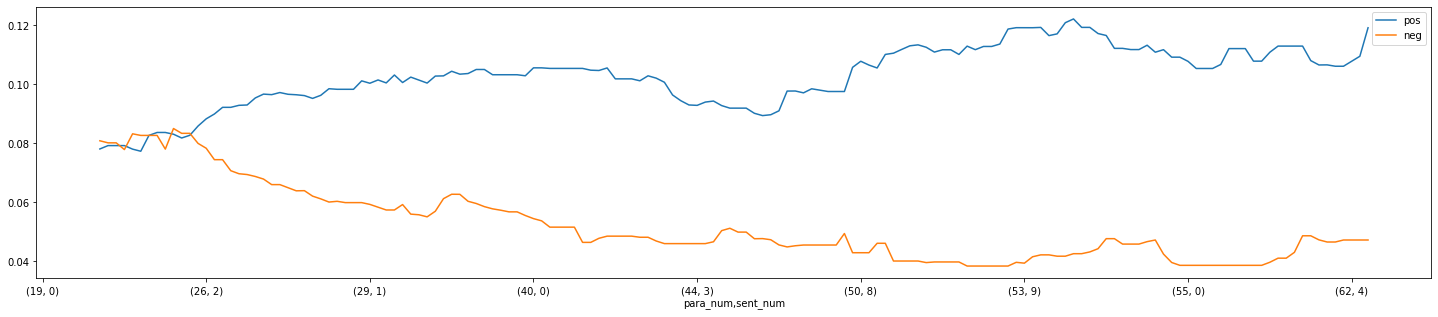

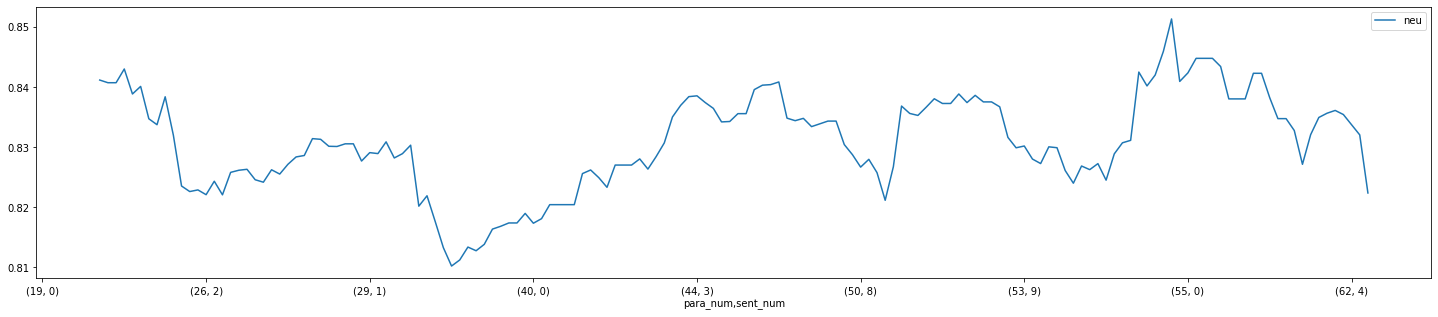

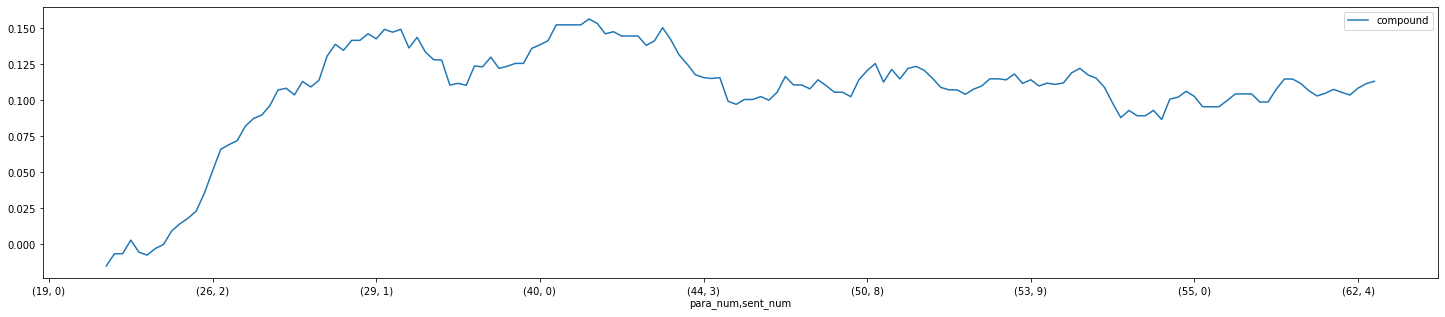

In [84]:
w = int(DIALOGUE_vader.shape[0] / 5)
REVOLT_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
REVOLT_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
REVOLT_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))